In [23]:
import pandas as pd
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv("Car_Final.csv")
df

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [25]:
scaler=MinMaxScaler()
df_1=scaler.fit_transform(df)
df_2=pd.DataFrame(df_1,columns=df.columns)
df_2

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,1.000000,1.000000,0.0,0.0,1.0,0.5,0.666667
1,1.000000,1.000000,0.0,0.0,1.0,1.0,0.666667
2,1.000000,1.000000,0.0,0.0,1.0,0.0,0.666667
3,1.000000,1.000000,0.0,0.0,0.5,0.5,0.666667
4,1.000000,1.000000,0.0,0.0,0.5,1.0,0.666667
...,...,...,...,...,...,...,...
1723,0.333333,0.333333,1.0,1.0,0.5,1.0,0.333333
1724,0.333333,0.333333,1.0,1.0,0.5,0.0,1.000000
1725,0.333333,0.333333,1.0,1.0,0.0,0.5,0.666667
1726,0.333333,0.333333,1.0,1.0,0.0,1.0,0.333333


In [26]:
Start=time.time()
agglomerative=AgglomerativeClustering(n_clusters=4,linkage='ward')
agglomerative.fit(df_2)
agglomerative_label=agglomerative.fit_predict(df_2)
print("分群結果:")
print(agglomerative_label)
print("-------------------------")
End=time.time()
print("運算時間: ",End-Start)

分群結果:
[1 1 1 ... 0 3 0]
-------------------------
運算時間:  0.13002467155456543


In [27]:
len(agglomerative_label)

1728

In [28]:
agglomerative_add=df_2
agglomerative_add['Cluster']=agglomerative_label
agglomerative_add

,buying,maint,doors,persons,lug_boot,safety,Class Values,Cluster
0,1.000000,1.000000,0.0,0.0,1.0,0.5,0.666667,1
1,1.000000,1.000000,0.0,0.0,1.0,1.0,0.666667,1
2,1.000000,1.000000,0.0,0.0,1.0,0.0,0.666667,1
3,1.000000,1.000000,0.0,0.0,0.5,0.5,0.666667,1
4,1.000000,1.000000,0.0,0.0,0.5,1.0,0.666667,1
...,...,...,...,...,...,...,...,...
1723,0.333333,0.333333,1.0,1.0,0.5,1.0,0.333333,3
1724,0.333333,0.333333,1.0,1.0,0.5,0.0,1.000000,0
1725,0.333333,0.333333,1.0,1.0,0.0,0.5,0.666667,0
1726,0.333333,0.333333,1.0,1.0,0.0,1.0,0.333333,3


In [29]:
agglomerative_results=agglomerative_add.groupby("Cluster").sum()
agglomerative_results

,buying,maint,doors,persons,lug_boot,safety,Class Values
Cluster,,,,,,,
0,317.000000,332.0,297.000000,485.0,310.5,308.5,430.333333
1,338.000000,322.0,328.000000,43.0,348.0,336.5,441.333333
2,107.666667,112.0,117.666667,171.0,130.5,0.0,10.000000
3,101.333333,98.0,121.333333,165.0,75.0,219.0,13.000000


In [31]:
purityList=[]
total=0
for i in range(4):
    purity=agglomerative_results.loc[i].max()/agglomerative_results.loc[i].sum()
    purityList.append(purity)
    total=total+agglomerative_results.loc[i].sum()

In [32]:
print("純度:\n",purityList)
print("總和:\n",total)

純度:
 [0.19553823410831894, 0.20462097210416674, 0.26354996146930393, 0.2762825904121112]
總和:
 6078.666666666664


In [33]:
Total_purity=0
for i in range(len(purityList)):
    Total_purity=Total_purity+purityList[i]*(agglomerative_results.loc[i].sum()/total)
print("總純度:\n",Total_purity)

總純度:
 0.21654968194779628


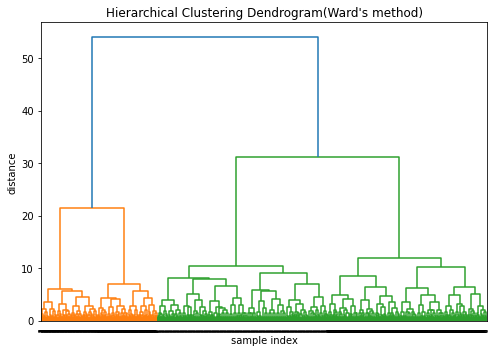

In [34]:
linkage_matrix=linkage(df_2,"ward")
num=plt.figure(figsize=(7,5))
dendrogram(linkage_matrix,labels=agglomerative_label)
plt.title("Hierarchical Clustering Dendrogram(Ward's method)")
plt.xlabel("sample index")
plt.ylabel("distance")
plt.tight_layout()
plt.show()